# AIM : Trying out different Methods of Data Visualization

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Training Dataset 

In [2]:
passengers = pd.read_csv('titanicTrainingData.csv')
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Plotting Correspondance

1. Neither *Name* nor *PassengerId* will influence whether the person survives or dies, hence they can be dropped. This is also true for *Ticket* and *Cabin*.
2. Since it is difficult to work with `str` datatype, *Sex* and *Embarked* are changed to `numeric` datatype.
3. In *Sex* column, *female* is Encoded as 1 and *male* is Encoded as 2.
4. *Embarked* may have some correspondance to survival, although somewhat vague, so it is retained.
    1. *C* is Encoded as 1
    2. *Q* is Encoded as 2
    3. *S* is Encoded as 3

In [3]:
factors = passengers.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)
factors['Sex'] = factors['Sex'].replace(['female','male'],[1,2])
factors['Embarked'] = factors['Embarked'].replace(['C','Q','S'],[1,2,3])
factors

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,2,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
886,0,2,2,27.0,0,0,13.0000,3.0
887,1,1,1,19.0,0,0,30.0000,3.0
888,0,3,1,NaN,1,2,23.4500,3.0
889,1,1,2,26.0,0,0,30.0000,1.0


   ## Plotting the correlation with `Survived` class

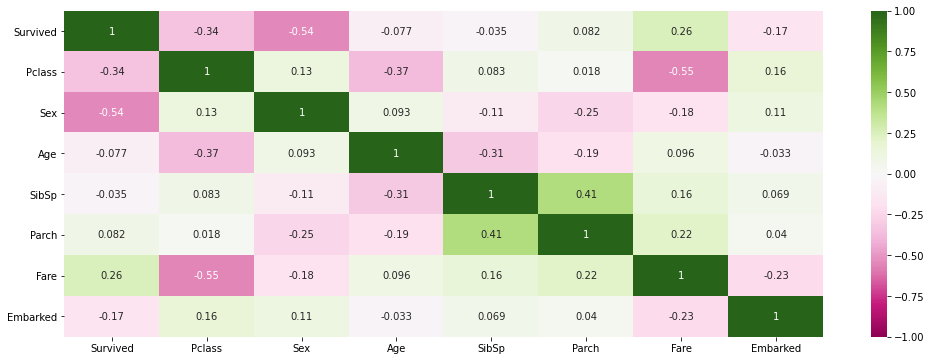

In [4]:
plt.figure(figsize=(17,6))
heatmap = sns.heatmap(factors.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')

Thus we can conclude that *Survived* passangers have a strong correlation with *Pclass*, *Sex* and *Fare*, a weak correlation with *Fare* and a still weaker correlation with *Embarked* and negligible correlation with others.

In [46]:
factors.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,1.647587,29.699118,0.523008,0.381594,32.204208,2.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,2.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000


## Making of Survival and Death Tables

In [5]:
survived = passengers.loc[passengers['Survived']==1]
dead = passengers.loc[passengers['Survived']==0]

## Survival and Deaths based on Embarkment

In [6]:
passengers['Embarked'].value_counts().sort_index()

C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [7]:
survived['Embarked'].value_counts().sort_index()

C     93
Q     30
S    217
Name: Embarked, dtype: int64

In [8]:
dead['Embarked'].value_counts().sort_index()

C     75
Q     47
S    427
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

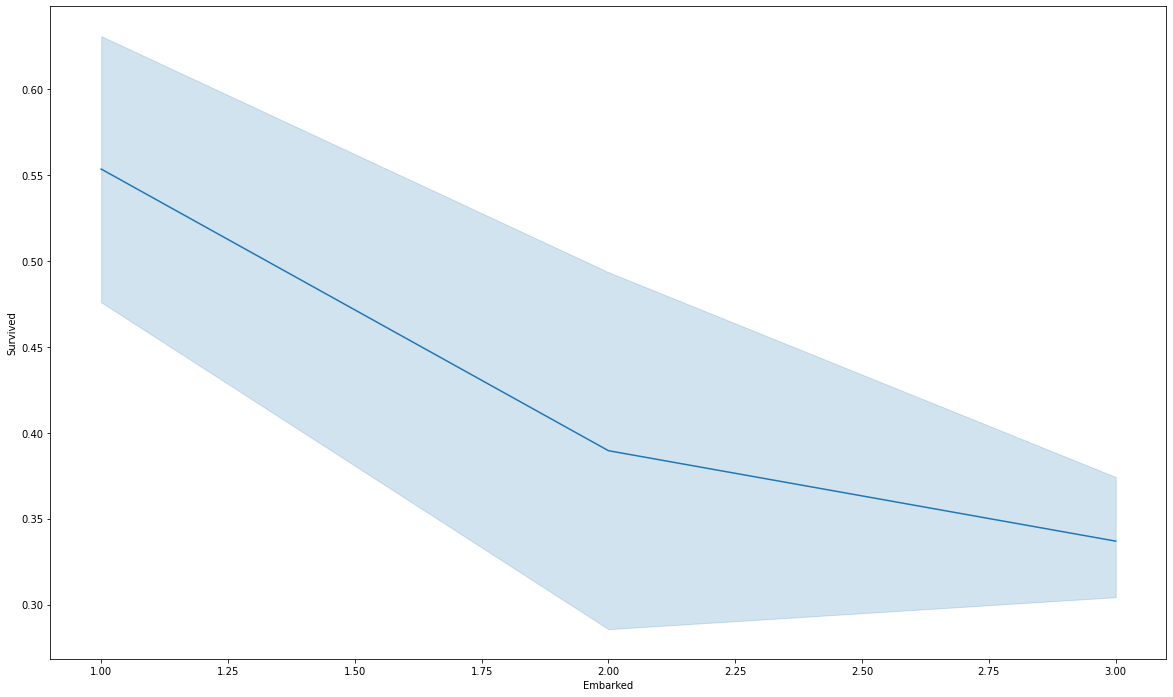

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12)
sns.lineplot(data=factors,y="Survived",x="Embarked")

In [58]:
factors.groupby(by='Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,549,549,424,549,549,549,549
1,342,342,290,342,342,342,340


## Survival and Death based on Gender

In [11]:
survived['Sex'].value_counts().sort_index()

female    233
male      109
Name: Sex, dtype: int64

In [59]:
survived['Sex'].value_counts(normalize=True).sort_index()

female    0.681287
male      0.318713
Name: Sex, dtype: float64

## Survival and Death based on PClass

In [13]:
passengers['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [14]:
survived['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

In [60]:
survived['Pclass'].value_counts(normalize=True).sort_index()

1    0.397661
2    0.254386
3    0.347953
Name: Pclass, dtype: float64

## Survival and Death based on Siblings and Spouse

In [16]:
passengers['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [17]:
survived['SibSp'].value_counts().sort_index()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [61]:
survived['SibSp'].value_counts(normalize=True).sort_index()

0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: SibSp, dtype: float64

## Survival and Death based on Fare

In [62]:
passengers.groupby(by='Fare').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
Fare,,,,,,,,,,,
0.0000,15,15,15,15,15,7,15,15,15,3,15
4.0125,1,1,1,1,1,1,1,1,1,0,1
5.0000,1,1,1,1,1,1,1,1,1,1,1
6.2375,1,1,1,1,1,1,1,1,1,0,1
6.4375,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
227.5250,4,4,4,4,4,3,4,4,4,2,4
247.5208,2,2,2,2,2,2,2,2,2,2,2
262.3750,2,2,2,2,2,2,2,2,2,2,2


In [19]:
passengers['Fare'].value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

In [20]:
survived['Fare'].value_counts().sort_index()

0.0000      1
6.9750      1
7.1417      1
7.2250      3
7.2292      4
           ..
227.5250    3
247.5208    1
262.3750    2
263.0000    2
512.3292    3
Name: Fare, Length: 153, dtype: int64

In [21]:
dead['Fare'].value_counts().sort_index()

0.0000      14
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
211.5000     1
221.7792     1
227.5250     1
247.5208     1
263.0000     2
Name: Fare, Length: 177, dtype: int64